In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import os
import sys
import numpy as np # linear algebra
np.set_printoptions(threshold=sys.maxsize)
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import glob as glob

from sklearn import model_selection, preprocessing, ensemble, metrics, feature_selection
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.feature_extraction import image
from sklearn import svm
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import BaggingClassifier
from scipy import stats, spatial, sparse
from datetime import datetime
from PIL import Image
from skimage.io import imread, imshow
from skimage.filters import prewitt_h,prewitt_v
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import math

In [2]:
# set train_df as the training dataframe
train_df = pd.read_json("train.json")

# look at the first 25 rows of training data
train_df.head(25)

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,low
9,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,c8b10a317b766204f08e613cef4ce7a0,[https://photos.renthop.com/2/7158677_c897a134...,3495,405 East 56th Street,medium
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,medium
15,1.0,0,bfb9405149bfff42a92980b594c28234,2016-06-28 03:50:23,Over-sized Studio w abundant closets. Availabl...,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",40.7439,7225292,-73.9743,2c3b41f588fbb5234d8a1e885a436cfa,[https://photos.renthop.com/2/7225292_901f1984...,2795,340 East 34th Street,low
16,1.0,3,300d27d8ba2adbcbc8c6f2bcbc1c6f9d,2016-06-28 05:59:06,This spectacular converted 3 bed apartment all...,East 16th Street,"[Doorman, Elevator, Loft, Dishwasher, Hardwood...",40.7348,7226687,-73.9865,30a7951cfc21240e8c46b2d079d292e5,[https://photos.renthop.com/2/7226687_4ea22bf1...,7200,145 East 16th Street,low
18,2.0,3,0d01cabe55fa5192cdbcabd5c585c1ea,2016-06-08 06:21:36,AMAZING DEAL!! BRAND NEW RENOVATIONS IN THIS H...,East 13th Street,"[Fireplace, Laundry in Unit, Dishwasher, Hardw...",40.7302,7126989,-73.9826,9f39caedae295bf81e67463e6fd0af40,[https://photos.renthop.com/2/7126989_a74ab3da...,6000,410 East 13th Street,low
19,1.0,0,d48767c37a934daaf0bbb0e58c755d0c,2016-06-05 05:28:22,No Fee Large Renovated Sun Splashed Studio. Wa...,York Avenue,"[Elevator, Laundry in Building, Dishwasher, Ha...",40.7769,7114138,-73.9467,9cbfa7a31ae9dfba70b4383636d99788,[https://photos.renthop.com/2/7114138_68d035c3...,1945,1661 York Avenue,high
23,0.0,1,d1ca33a2853e64fad6e4009d5d5d168f,2016-06-09 04:42:03,Extra large one bedroom apartment located in P...,E 19 Street,[Hardwood Floors],40.7346,7131094,-73.9811,b89e62bf8cdc98e9fb8b97d9bc627197,[https://photos.renthop.com/2/7131094_2117d8a9...,2435,346 E 19 Street,low
32,3.0,3,5f35dc2f0191baf109221752e6ee0c48,2016-06-28 03:26:18,Listed: 06/26/16<br /><br />Available:...,Hicks Street,"[Cats Allowed, Dogs Allowed]",40.6990,7224815,-73.9943,d5d246c9d9d4e7079e5a0fc962d2f1a7,[https://photos.renthop.com/2/7224815_8ff8a811...,6850,94 Hicks Street,low


In [3]:
test_df = pd.read_json("test.json")
train_df.info()
print("# of train rows : ", train_df.shape[0])
print("# of test rows : ", test_df.shape[0])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49352 entries, 4 to 124009
Data columns (total 15 columns):
bathrooms          49352 non-null float64
bedrooms           49352 non-null int64
building_id        49352 non-null object
created            49352 non-null object
description        49352 non-null object
display_address    49352 non-null object
features           49352 non-null object
latitude           49352 non-null float64
listing_id         49352 non-null int64
longitude          49352 non-null float64
manager_id         49352 non-null object
photos             49352 non-null object
price              49352 non-null int64
street_address     49352 non-null object
interest_level     49352 non-null object
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB
# of train rows :  49352
# of test rows :  74659


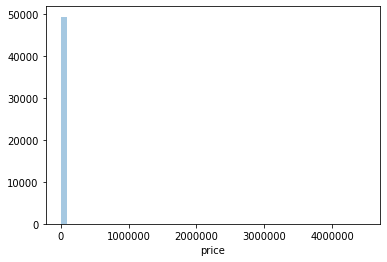

In [4]:
# Plot histograms for the following numeric columns: Price, Latitude & Longitude
# None of the histograms are very useful due to outliers

sns.distplot(train_df['price'], kde = False)

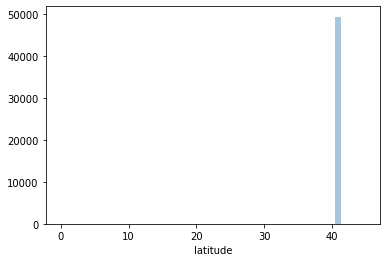

In [5]:
sns.distplot(train_df['latitude'], kde = False)

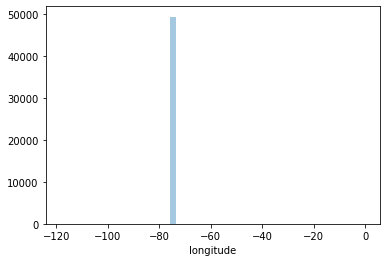

In [6]:
sns.distplot(train_df['longitude'], kde = False)

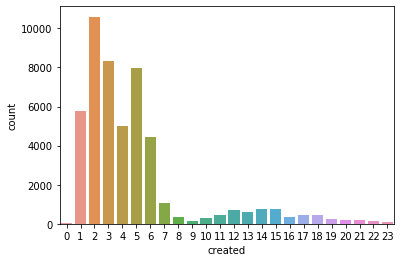

In [7]:
# Plot hour-wise listing trend and find out the top 5 busiest hours of postings

train_df['created'] = pd.to_datetime(train_df['created'])

sns.countplot(train_df.created.dt.hour)

# the five busiest hours of postings are (in decreasing order): 2 AM, 3 AM, 5 AM, 2 AM, 4 AM

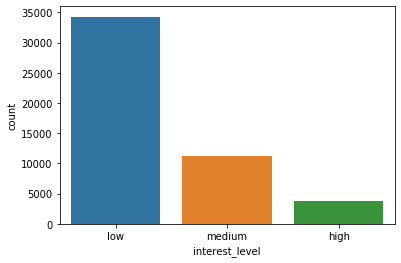

In [8]:
# Visualization to show the proportion of target variable values

sns.countplot(train_df['interest_level'], order=['low','medium','high'])

# Most properties have an interest level of low, which makes sense. The properties with higher interest levels
# will be sold off first

In [9]:
# !!!Find the number of missing values in each variable
# bathrooms	bedrooms	building_id	created	description	display_address	features	latitude	listing_id	longitude	manager_id	photos	price	street_address	interest_level
# number of null values in each variable
latitude_count = 0
longitude_count = 0
price_count = 0
bedroom_count = 0
bathroom_count = 0
building_id_count = 0
created_count = 0
display_address_count = 0
description_count = 0
features_count = 0;
manager_id_count = 0
photos_count = 0
street_address_count = 0
interest_level_count = 0
listing_id_count = 0;

print ("TOTAL MISSING VALUES")
median = train_df['latitude'].median()
for b in train_df['latitude']:
    if b == 0:
        latitude_count += 1
        b = median
print ("Latitude : ", latitude_count)

for b in train_df['listing_id']:
    if b == 0:
        listing_id_count += 1
print ("listing_id ", listing_id_count)

# bedroom and bathroom can be zero!!! Have to fix these two
for b in train_df['bedrooms']:
    if b == 0 or isinstance(b, int) == False:
        bedroom_count += 1
        #print(b)
print ("bedrooms", bedroom_count)

for b in train_df['bathrooms']:
    if b == 0 or isinstance(b, float) == False:
        bathroom_count += 1
        #print(b)
print ("bathrooms", bathroom_count)
#

median = train_df['longitude'].median()
for b in train_df['longitude']:
    if b == 0:
        longitude_count += 1
        b = median
print ("longitude", longitude_count)

median = train_df['price'].median()
for b in train_df['price']:
    if b == 0:
        price_count += 1
        b = median
print ("price", price_count)

for b in train_df['building_id']:
    if b == "":
        building_id_count += 1
print ("building_id", building_id_count)


#length of date format is 19
for b in train_df['created']:
    if b == "":
        created_count += 1
        #print(b)
print ("created", created_count)

for b in train_df['description']:
    if b == "" or b is None or len(b) < 4: # shows irrelevant data for len < 4
        description_count += 1
        #print(b)
print ("description", description_count)

for b in train_df['display_address']:
    if b == "" or len(b) < 3: # displays irrelevant value for len < 3
        #print(b)
        display_address_count += 1
        #print(b)
print ("display_address", display_address_count)

for b in train_df['features']:
    if b == "":
        features_count += 1
print ("features", features_count)

for b in train_df['manager_id']:
    if b == "" or b is None:
        manager_id_count += 1
        #print(b)
print ("manager_id", manager_id_count)

for b in train_df['photos']:
    if b == "" or b is None:
        photos_count += 1
        #print(b)
print ("photos", photos_count)

for b in train_df['street_address']:
    if b == "" or len(b) < 4: # Found garbage value "hi5"
        #print(b)
        street_address_count += 1
        #print(b)
print ("street_address", street_address_count)

for b in train_df['interest_level']:
    if b == "" or b is None:
        interest_level_count += 1
        #print(b)
print ("interest_level", interest_level_count)

#for b in train_df['features']:
 #   print(b)


TOTAL MISSING VALUES
Latitude :  12
listing_id  0
bedrooms 9475
bathrooms 313
longitude 12
price 0
building_id 0
created 0
description 1686
display_address 137
features 0
manager_id 0
photos 0
street_address 11
interest_level 0


In [10]:
# Find out the number of outliers in each variable

z = np.abs(stats.zscore(train_df[['bedrooms', 'bathrooms', 'latitude', 'longitude', 'price']]))

threshold = 3

outliers = np.where(z>threshold)
outliersRow = outliers[0]
outliersCol = outliers[1]

bedrooms_outliers = 0 
bathrooms_outliers = 0
latitude_outliers = 0
longitude_outliers = 0 
price_outliers = 0

for val in outliersCol:
    if val == 0:
        bedrooms_outliers += 1
    elif val == 1:
        bathrooms_outliers += 1
    elif val == 2:
        latitude_outliers += 1
    elif val == 3:
        longitude_outliers += 1
    else:
        price_outliers += 1

print('TOTAL OUTLIERS')
print('bedrooms : ', bedrooms_outliers)
print('bathrooms : ', bathrooms_outliers)
print('latitude : ', latitude_outliers)
print('longitude : ', longitude_outliers)
print('price : ', price_outliers)



TOTAL OUTLIERS
bedrooms :  297
bathrooms :  1035
latitude :  18
longitude :  16
price :  10


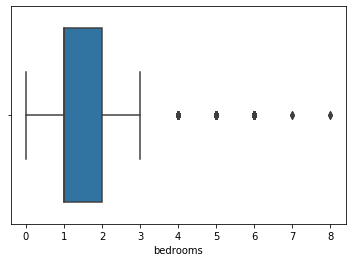

In [11]:
# Plot visualizations to demonstrate outliers

sns.boxplot(x = train_df['bedrooms'])

True


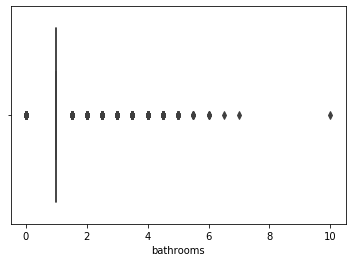

In [12]:
temp = "6"
print(temp.isdigit())
sns.boxplot(x = train_df['bathrooms'])

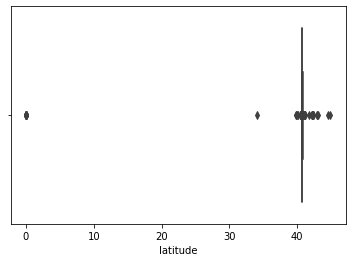

In [13]:
sns.boxplot(x = train_df['latitude'])

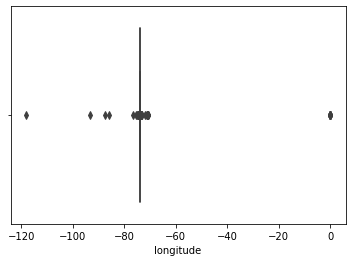

In [14]:
sns.boxplot(x = train_df['longitude'])

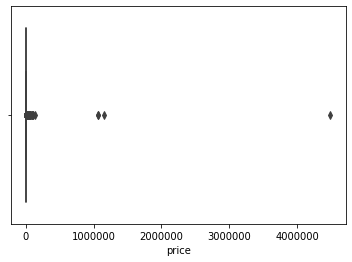

In [15]:
sns.boxplot(x = train_df['price'])

In [16]:
# Find outliers using Z-score
# look through latitude, longitude, price

z = np.abs(stats.zscore(train_df[['latitude', 'longitude', 'price']]))
threshold = 3

# Remove outliers from these columns with a z-score greater than 3
train_df_o = train_df[(z<threshold).all(axis=1)]

z = np.abs(stats.zscore(train_df_o[['bedrooms', 'bathrooms']]))
# Remove outliers from bedrooms and bathrooms with very high z-score
# we do this because these attributes are integers and highly concentrated. i.e. most properties only have 1-2 bedrooms and 1 bathroom
# therefore, we only need to get rid of the farthest outliers to get good results
train_df_o = train_df_o[(z<5).all(axis=1)]

print(train_df.shape)
print(train_df_o.shape)

train_df = train_df_o

(49352, 15)
(49105, 15)


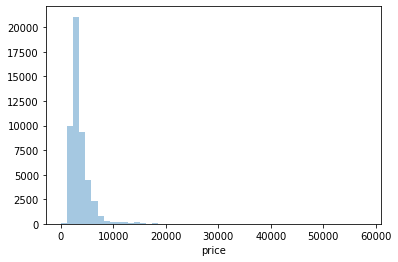

In [17]:
# Plot histograms for the following numeric columns:
# Price

sns.distplot(train_df['price'], kde = False)

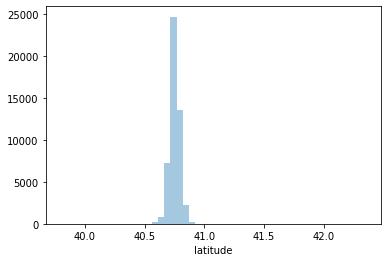

In [18]:
# Latitude

sns.distplot(train_df['latitude'], kde = False)

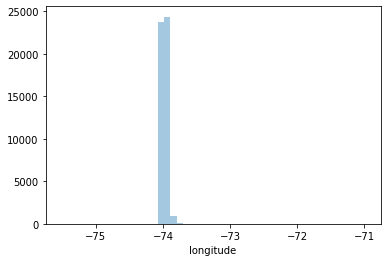

In [19]:
#Longitide

sns.distplot(train_df['longitude'], kde = False)

In [20]:
# Extract features from the images and transform it into data that’s ready to be used in the model for classification.

# Feature 1: Grayscale pixel values      ~~~ Commented out due to memory issues ~~~
#grayscale_feat_list = []
#for filename in glob.glob('images_sample/*/*.jpg'):
#    img = imread(filename, as_gray=True)
#    imgFeature = np.reshape(img, (img.shape[0]*img.shape[1]))    
#    grayscale_feat_list.append(imgFeature)


# Feature 2: Channel mean pixel values
#mean_pix_list = []
#for filename in glob.glob('images_sample/*/*.jpg'):
#    colorImg = imread(filename)
#    print(filename)
#    feat_matrix = np.zeros((colorImg.shape[0], colorImg.shape[1]))
#    for i in range(0, colorImg.shape[0]):
#        for j in range(0, colorImg.shape[1]):
#                feat_matrix[i][j] = ((int(colorImg[i,j,0]) + int(colorImg[i,j,1]) + int(colorImg[i,j,2]))/3)
#    feature = np.reshape(feat_matrix, (colorImg.shape[0]*colorImg.shape[1]))
#    mean_pix_list.append(feature)


In [21]:
# Drop duplicate features

train_df['features'] = train_df.loc[:,'features'].apply(lambda x: ' '.join(x))
train_df['photos'] = train_df.loc[:,'photos'].apply(lambda x: ' '.join(x))
test_df['features'] = test_df.loc[:,'features'].apply(lambda x: ' '.join(x))
test_df['photos'] = test_df.loc[:,'photos'].apply(lambda x: ' '.join(x))
train_df = train_df.drop_duplicates()
test_df = test_df.drop_duplicates()

In [22]:
# Extract features from the text data and transform it into data that's ready to be used in the model for classification

# number of photos
train_df['num_photos'] = train_df['photos'].apply(len)
test_df['num_photos'] = test_df['photos'].apply(len)

# number of features
train_df['num_features'] = train_df['features'].apply(len)
test_df['num_features'] = test_df['features'].apply(len)

# get hour, day, month, year
train_df['hour'] = train_df.created.dt.hour
train_df['day'] = train_df.created.dt.day
train_df['month'] = train_df.created.dt.month
train_df['year'] = train_df.created.dt.year

test_df['created'] = pd.to_datetime(test_df['created'])
test_df['hour'] = test_df.created.dt.hour
test_df['day'] = test_df.created.dt.day
test_df['month'] = test_df.created.dt.month
test_df['year'] = test_df.created.dt.year

train_df["num_description_words"] = train_df["description"].apply(lambda x: len(x.split(" ")))
test_df["num_description_words"] = test_df["description"].apply(lambda x: len(x.split(" ")))

# use label encoder to normalize labels
#categorical = ["display_address", "manager_id", "building_id", "street_address"]
#for f in categorical:
#    le = preprocessing.LabelEncoder()
#    le.fit(list(train_df[f].values) + list(test_df[f].values))
#    train_df[f] = le.transform(list(train_df[f].values))
#    test_df[f] = le.transform(list(test_df[f].values))

# Bagging additional features
bagging_train = train_df
bagging_test = test_df

# drop non-numerical columns
train_df = train_df.drop(['created','description','features','photos', 'display_address', 'manager_id', 'building_id', 'street_address'], axis=1)
test_df = test_df.drop(['created','description','features','photos', 'display_address', 'manager_id', 'building_id', 'street_address'], axis=1)

train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49105 entries, 4 to 124009
Data columns (total 14 columns):
bathrooms                49105 non-null float64
bedrooms                 49105 non-null int64
latitude                 49105 non-null float64
listing_id               49105 non-null int64
longitude                49105 non-null float64
price                    49105 non-null int64
interest_level           49105 non-null object
num_photos               49105 non-null int64
num_features             49105 non-null int64
hour                     49105 non-null int64
day                      49105 non-null int64
month                    49105 non-null int64
year                     49105 non-null int64
num_description_words    49105 non-null int64
dtypes: float64(3), int64(10), object(1)
memory usage: 5.6+ MB


In [23]:
# import data on subway

subway_df = pd.read_csv('DOITT_SUBWAY_STATION_01_13SEPT2010.csv')
subway_df.head()

,URL,OBJECTID,NAME,the_geom,LINE,NOTES
0,http://web.mta.info/nyct/service/,1,Astor Pl,POINT (-73.99106999861966 40.73005400028978),4-6-6 Express,"4 nights, 6-all times, 6 Express-weekdays AM s..."
1,http://web.mta.info/nyct/service/,2,Canal St,POINT (-74.00019299927328 40.71880300107709),4-6-6 Express,"4 nights, 6-all times, 6 Express-weekdays AM s..."
2,http://web.mta.info/nyct/service/,3,50th St,POINT (-73.98384899986625 40.76172799961419),1-2,"1-all times, 2-nights"
3,http://web.mta.info/nyct/service/,4,Bergen St,POINT (-73.97499915116808 40.68086213682956),2-3-4,"4-nights, 3-all other times, 2-all times"
4,http://web.mta.info/nyct/service/,5,Pennsylvania Ave,POINT (-73.89488591154061 40.66471445143568),3-4,"4-nights, 3-all other times"


In [24]:
# splice the_geom into longitude and latitude columns

split = subway_df['the_geom'].str.split(expand=True)
subway_df['longitude']=split[1].str.slice(start=1).astype(float)
subway_df['latitude']=split[2].str.slice(start=0, stop=-1).astype(float)

subway_df.head()

,URL,OBJECTID,NAME,the_geom,LINE,NOTES,longitude,latitude
0,http://web.mta.info/nyct/service/,1,Astor Pl,POINT (-73.99106999861966 40.73005400028978),4-6-6 Express,"4 nights, 6-all times, 6 Express-weekdays AM s...",-73.991070,40.730054
1,http://web.mta.info/nyct/service/,2,Canal St,POINT (-74.00019299927328 40.71880300107709),4-6-6 Express,"4 nights, 6-all times, 6 Express-weekdays AM s...",-74.000193,40.718803
2,http://web.mta.info/nyct/service/,3,50th St,POINT (-73.98384899986625 40.76172799961419),1-2,"1-all times, 2-nights",-73.983849,40.761728
3,http://web.mta.info/nyct/service/,4,Bergen St,POINT (-73.97499915116808 40.68086213682956),2-3-4,"4-nights, 3-all other times, 2-all times",-73.974999,40.680862
4,http://web.mta.info/nyct/service/,5,Pennsylvania Ave,POINT (-73.89488591154061 40.66471445143568),3-4,"4-nights, 3-all other times",-73.894886,40.664714


In [25]:
# import subway data and add new column specifying distance to nearest subway

tree = spatial.KDTree(subway_df[['longitude', 'latitude']])
train_df['distance_to_subway'] = tree.query(train_df[['longitude', 'latitude']])[0].astype(float)
test_df['distance_to_subway'] = tree.query(test_df[['longitude', 'latitude']])[0].astype(float)


In [26]:
# Need to put all columns except interest_level into X
# Need to put interest_level into Y

RFE_X = train_df.loc[:, train_df.columns != 'interest_level']
RFE_y = train_df.loc[:, train_df.columns == 'interest_level']
RFE_y = RFE_y.values.ravel()


In [27]:
# Recursive feature elimination

RFEmodel = LogisticRegression(solver = 'lbfgs', multi_class='auto', max_iter=10000)
rfe = feature_selection.RFECV(RFEmodel, cv=3)
rfe = rfe.fit(RFE_X, RFE_y)
print(rfe.support_)
print(rfe.ranking_)

# these results suggest that we should:
# keep - listing_id, price, num_photos, num_features, hour, day, year, num_description_words
# then in order of importance - bedrooms, bathrooms, longitude, latitude, month, distance_to_subway

[False False False  True False  True  True  True  True  True False  True
  True False]
[3 2 5 1 4 1 1 1 1 1 6 1 1 7]


In [28]:
# Remove least important features
train_df = train_df.drop(['month'], axis = 1)
test_df = test_df.drop(['month'], axis = 1)

train_df = train_df.drop(['distance_to_subway'], axis = 1)
test_df = test_df.drop(['distance_to_subway'], axis = 1)

# train_df = train_df.drop(['latitude'], axis = 1)
# test_df = test_df.drop(['latitude'], axis = 1)

# train_df = train_df.drop(['longitude'], axis = 1)
# test_df = test_df.drop(['longitude'], axis = 1)

# train_df = train_df.drop(['bathrooms'], axis = 1)
# test_df = test_df.drop(['bathrooms'], axis = 1)

# train_df = train_df.drop(['bedrooms'], axis = 1)
# test_df = test_df.drop(['bedrooms'], axis = 1)

# svm_train = svm_train.drop(['month'], axis = 1)
# svm_test = svm_test.drop(['month'], axis = 1)

train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49105 entries, 4 to 124009
Data columns (total 13 columns):
bathrooms                49105 non-null float64
bedrooms                 49105 non-null int64
latitude                 49105 non-null float64
listing_id               49105 non-null int64
longitude                49105 non-null float64
price                    49105 non-null int64
interest_level           49105 non-null object
num_photos               49105 non-null int64
num_features             49105 non-null int64
hour                     49105 non-null int64
day                      49105 non-null int64
year                     49105 non-null int64
num_description_words    49105 non-null int64
dtypes: float64(3), int64(9), object(1)
memory usage: 5.2+ MB


In [29]:
# XGBoost - setup
target_num_map = {'high':0, 'medium':1, 'low':2}

train_X = train_df.loc[:, train_df.columns != 'interest_level']
train_y = train_df['interest_level'].apply(lambda x: target_num_map[x])
train_y = train_y.values.ravel()

test_X = test_df.loc[:, test_df.columns != 'interest_level']

In [30]:
# cross-validation for XGBoost

param = {}
param['objective'] = 'multi:softprob'
param['eta'] = 0.1
param['max_depth'] = 6
param['silent'] = 1
param['num_class'] = 3
param['eval_metric'] = "mlogloss"
param['min_child_weight'] = 1
param['subsample'] = 0.7
param['colsample_bytree'] = 0.7
param['seed'] = 0
param['nthread'] = 8
num_rounds = 1000

plst = list(param.items())

cv_scores = []
kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=2016)
for train_index, val_index in kf.split(range(train_X.shape[0])):
        train_X, val_X = train_X.iloc[train_index,:], train_X.iloc[val_index,:]
        train_y, val_y = train_y[train_index], train_y[val_index]        
        xgtrain = xgb.DMatrix(train_X, label=train_y)
        if val_y is not None:
            xgtest = xgb.DMatrix(val_X, label=val_y)
            watchlist = [ (xgtrain,'train'), (xgtest, 'test') ]
            model = xgb.train(plst, xgtrain, num_rounds, watchlist, early_stopping_rounds=20)
        else:
            xgtest = xgb.DMatrix(val_X)
            model = xgb.train(plst, xgtrain, num_rounds)
        preds = model.predict(xgtest)
        cv_scores.append(metrics.log_loss(val_y, preds))
        print(cv_scores)
        break

[0]	train-mlogloss:1.0452	test-mlogloss:1.04628
Multiple eval metrics have been passed: 'test-mlogloss' will be used for early stopping.

Will train until test-mlogloss hasn't improved in 20 rounds.
[1]	train-mlogloss:0.996226	test-mlogloss:0.998816
[2]	train-mlogloss:0.956508	test-mlogloss:0.960078
[3]	train-mlogloss:0.919532	test-mlogloss:0.924382
[4]	train-mlogloss:0.887198	test-mlogloss:0.893405
[5]	train-mlogloss:0.858136	test-mlogloss:0.865247
[6]	train-mlogloss:0.835747	test-mlogloss:0.843635
[7]	train-mlogloss:0.815729	test-mlogloss:0.824452
[8]	train-mlogloss:0.797684	test-mlogloss:0.807382
[9]	train-mlogloss:0.780332	test-mlogloss:0.791121
[10]	train-mlogloss:0.764225	test-mlogloss:0.775992
[11]	train-mlogloss:0.75177	test-mlogloss:0.764329
[12]	train-mlogloss:0.737858	test-mlogloss:0.751411
[13]	train-mlogloss:0.726243	test-mlogloss:0.740394
[14]	train-mlogloss:0.716702	test-mlogloss:0.731454
[15]	train-mlogloss:0.707845	test-mlogloss:0.723411
[16]	train-mlogloss:0.69959	tes

[155]	train-mlogloss:0.499455	test-mlogloss:0.596381
[156]	train-mlogloss:0.498951	test-mlogloss:0.596319
[157]	train-mlogloss:0.498489	test-mlogloss:0.596306
[158]	train-mlogloss:0.497779	test-mlogloss:0.596193
[159]	train-mlogloss:0.497398	test-mlogloss:0.596096
[160]	train-mlogloss:0.496865	test-mlogloss:0.59608
[161]	train-mlogloss:0.496394	test-mlogloss:0.596114
[162]	train-mlogloss:0.495823	test-mlogloss:0.595936
[163]	train-mlogloss:0.495253	test-mlogloss:0.595964
[164]	train-mlogloss:0.494657	test-mlogloss:0.595933
[165]	train-mlogloss:0.49393	test-mlogloss:0.595848
[166]	train-mlogloss:0.493413	test-mlogloss:0.595934
[167]	train-mlogloss:0.493014	test-mlogloss:0.59592
[168]	train-mlogloss:0.492449	test-mlogloss:0.595962
[169]	train-mlogloss:0.4917	test-mlogloss:0.595825
[170]	train-mlogloss:0.49132	test-mlogloss:0.595792
[171]	train-mlogloss:0.49079	test-mlogloss:0.595707
[172]	train-mlogloss:0.489967	test-mlogloss:0.595398
[173]	train-mlogloss:0.489414	test-mlogloss:0.595374


In [31]:
# Bagging data-preprocessing
bagging_train = bagging_train.drop(['created','description','features', 'display_address', 'manager_id', 'building_id', 'street_address'], axis=1)
bagging_test = bagging_test.drop(['created','description','features', 'display_address', 'manager_id', 'building_id', 'street_address'], axis=1)
bagging_train.info()

# Label Encoding for photo data
#le = preprocessing.LabelEncoder()
#for column_name in bagging_train.columns:
#    if bagging_train[column_name].dtype == object:
#        bagging_train[column_name] = le.fit_transform(bagging_train[column_name])
#    else:
#        pass

#for column_name in bagging_test.columns:
#    if bagging_test[column_name].dtype == object:
#        bagging_test[column_name] = le.fit_transform(bagging_test[column_name])
#    else:
#        pass
    
# Bagging - setup
bagging_X = bagging_train.loc[:, bagging_train.columns != 'interest_level']
bagging_Y = bagging_train.loc[:, bagging_train.columns == 'interest_level']
bagging_Y = bagging_Y.values.ravel()

bagging_test_X = bagging_test.loc[:, bagging_test.columns != 'interest_level']

tree = DecisionTreeClassifier(max_depth = 5)  
baggingClf = BaggingClassifier(tree, n_estimators = 100, max_features = 0.5)
baggingClf.fit(train_X, train_y)

crossVal = model_selection.cross_val_score(baggingClf, train_X, train_y, cv=10, scoring='neg_log_loss')
print("Bagging Logloss score:", np.absolute(crossVal))

baggingAcc = model_selection.cross_val_score(baggingClf, train_X, train_y, cv=5)
print('Bagging Accuracy score: ', baggingAcc)

# Bagging submission
bagging_Y_pred = baggingClf.predict_proba(test_X)
bagging_sub = pd.DataFrame(bagging_Y_pred)
bagging_sub.columns = ["high", "medium", "low"]
bagging_sub["listing_id"] = test_df.listing_id.values
bagging_sub.to_csv("bagging.csv", index=False)

# ~~Search for optimal parameters~~
#param_grid = {
#    'base_estimator__max_depth' : [1, 2, 3, 4, 5],
#    'max_samples' : [0.05, 0.1, 0.2, 0.5, 1.0]
#}

#baggingClf = GridSearchCV(BaggingClassifier(DecisionTreeClassifier(),
#                                            n_estimators = 100, max_features = 0.5),
#                                          param_grid)

#baggingClf.fit(train_X, train_y)
#opimizedBag = baggingClf.best_estimator_
#print(baggingClf.best_params_)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 49105 entries, 4 to 124009
Data columns (total 15 columns):
bathrooms                49105 non-null float64
bedrooms                 49105 non-null int64
latitude                 49105 non-null float64
listing_id               49105 non-null int64
longitude                49105 non-null float64
photos                   49105 non-null object
price                    49105 non-null int64
interest_level           49105 non-null object
num_photos               49105 non-null int64
num_features             49105 non-null int64
hour                     49105 non-null int64
day                      49105 non-null int64
month                    49105 non-null int64
year                     49105 non-null int64
num_description_words    49105 non-null int64
dtypes: float64(3), int64(10), object(2)
memory usage: 6.0+ MB
Bagging Logloss score: [0.70174056 0.70227938 0.70576483 0.70547185 0.69321866 0.69520538
 0.7010853  0.7030841  0.70355683 0.704

In [32]:
# XGBoost submission

xgtrain = xgb.DMatrix(train_X, label=train_y)
xgtest = xgb.DMatrix(test_X)
model = xgb.train(plst, xgtrain, num_rounds)
preds = model.predict(xgtest)

out_df = pd.DataFrame(preds)
out_df.columns = ["high", "medium", "low"]
out_df["listing_id"] = test_df.listing_id.values
out_df.to_csv("xgboost.csv", index=False)

In [33]:
# K - NEAREST NEIGHBOR CLASSIFIER
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import cross_val_score
# import math

K_train = pd.read_json("train.json")
K_test = pd.read_json("test.json")


# drop non-numerical attributes(8)
K_train = K_train.drop(['created','description','features','photos', 'display_address', 'manager_id', 'building_id', 'street_address'], axis=1)
K_test = K_test.drop(['created','description','features','photos', 'display_address', 'manager_id', 'building_id', 'street_address'], axis=1)

K_train = K_train.drop_duplicates()
K_test = K_test.drop_duplicates()

K_X = K_train.drop(['interest_level'], axis = 1)
K_Y = K_train.loc[:, K_train.columns == 'interest_level']
K_Y = K_Y.values.ravel()
K_train.shape



knn = KNeighborsClassifier(n_neighbors=74)
knn.fit(K_X, K_Y)

## KFOLD METHOD FOR CROSS VALIDATION (ALTERNATIVE)
# kfold = model_selection.KFold(n_splits=10, random_state=2000, shuffle=True)
# print(kfold)
# 10 fold cross validation

K_crossVal = cross_val_score(knn, K_X, K_Y, cv=10, scoring='neg_log_loss')
print("KNN Logloss score:", np.absolute(K_crossVal))
print(np.absolute(K_crossVal.mean()))

K_Acc = cross_val_score(knn, K_X, K_Y, cv=10)
print('KNN Accuracy score: ', K_Acc)
print(np.absolute(K_Acc.mean()))

# SUBMISSION FILE
K_Y_pred = knn.predict_proba(K_test)
K_sub = pd.DataFrame(K_Y_pred)
K_sub.columns = ["high", "medium", "low"]
K_sub["listing_id"] = K_test.listing_id.values
K_sub.to_csv("kNN.csv", index=False)

KNN Logloss score: [0.7550779  0.78736972 0.76985948 0.76806823 0.79020761 0.76035676
 0.79952197 0.7677879  0.79394923 0.7874281 ]
0.7779626890629452
KNN Accuracy score:  [0.69752836 0.69570502 0.69509724 0.6965154  0.69341439 0.69726444
 0.695846   0.69503546 0.69463019 0.6959254 ]
0.6956961905728786


In [34]:
print('Done!')

Done!
